# **What are the distractions of Montgomery county, Maryland?**

By Michael Gabriel and Nrupaja Vartak

###**Introduction**

We will be analyzing the vehicle crash data from Montgomery County in Maryland. 
In this project, we will studying the dataset of accidents occured in th Montgomery County with various visualizations.

This dataset contains information on drivers engaged in traffic accidents on county and local roads. The dataset contains information on all traffic collisions on county and local routes in Montgomery County, as gathered by the Maryland State Police's Automated Crash Reporting System (ACRS). This dataset contains information on each documented collision as well as the drivers involved. The dataset was initially created on September 19, 2017, and is constantly updated. Our dataset is up to October 21, 2021. Here, we will be examing the distractions of Montgomery county in the recent years and the causes.

The dataset contains a total of 131610 rows and 43 columns. Most columns are of datatype Object, and some are Integers and Floats. 




Imports and reading of the data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import rcParams
import matplotlib.pyplot as plt
import warnings

In [ ]:
# graphics (the right size will depend on your system)
rcParams['figure.figsize'] = 10,6
sns.set_context('notebook')   # 'talk' for slightly larger..

In [ ]:
#Disabling the warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data
# This is a randomly-sample subset of the full data set.
df = pd.read_csv("https://raw.githubusercontent.com/Myk-G/Git-CLI/main/Crash_Reporting_-_Drivers_Data.csv")


In [ ]:
df.index = pd.to_datetime(df['Crash Date/Time'])
df['DayOfWeek'] = df.index.weekday
df= df.sort_index()

### **Initial data exploration**

The original dataset contains a total of 131610 rows and 43 columns.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131610 entries, 2015-01-01 00:30:00 to 2021-10-21 09:26:00
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   131610 non-null  object 
 1   Local Case Number               131610 non-null  object 
 2   Agency Name                     131610 non-null  object 
 3   ACRS Report Type                131610 non-null  object 
 4   Crash Date/Time                 131610 non-null  object 
 5   Route Type                      118773 non-null  object 
 6   Road Name                       119448 non-null  object 
 7   Cross-Street Type               118761 non-null  object 
 8   Cross-Street Name               119443 non-null  object 
 9   Off-Road Description            12161 non-null   object 
 10  Municipality                    14464 non-null   object 
 11  Related Non-Motorist            4089 non-nul

In [ ]:
df.shape

(131610, 44)

Finding how many collision instances happen each day

In [ ]:
PerDay = (df.groupby(df.index.date).count())
PerDay['Collision Type']

2015-01-01    43
2015-01-02    36
2015-01-03    63
2015-01-04    38
2015-01-05    44
              ..
2021-10-17    33
2021-10-18    38
2021-10-19    38
2021-10-20    26
2021-10-21     3
Name: Collision Type, Length: 2486, dtype: int64

 We are able to capture the amounts of collisions per day from every column, but narrowed it down to view the occurances per day. Exploring that data leads us to wonder the max, min of the same data.

In [ ]:
PerDay['Collision Type'].describe().round(3)

count    2486.000
mean       52.766
std        18.778
min         3.000
25%        39.000
50%        52.000
75%        65.000
max       146.000
Name: Collision Type, dtype: float64

We found that in our dataset that maximum number of collisions in one day is a lot higher than the mean and median.

In [ ]:
df.describe().round(3)

,Speed Limit,Vehicle Year,Latitude,Longitude,DayOfWeek
count,131610.000,131610.000,131610.000,131610.000,131610.000
mean,32.774,1967.991,39.082,-77.112,2.807
std,11.047,332.768,0.072,0.099,1.902
min,0.000,0.000,37.720,-79.486,0.000
25%,30.000,2005.000,39.023,-77.188,1.000
50%,35.000,2010.000,39.074,-77.105,3.000
75%,40.000,2014.000,39.138,-77.040,4.000
max,70.000,9999.000,39.990,-75.528,6.000


We know that df contains 131,610 rows and 43 columns. However, we also need to know how much of that data is either missing or bad data.

In [ ]:
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         12837
Road Name                          12162
Cross-Street Type                  12849
Cross-Street Name                  12167
Off-Road Description              119449
Municipality                      117146
Related Non-Motorist              127521
Collision Type                       434
Weather                            10349
Surface Condition                  15499
Light                               1106
Traffic Control                    20481
Driver Substance Abuse             23989
Non-Motorist Substance Abuse      128370
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      106718
Driver Distracted By                   0
Drivers License 

In [ ]:
(df.isna().sum().sum())


762807

After we have the df, its important to look through a few variables, for reference, and to make sure that the results are tangible. However, it also helps gather some information on some basic simple attributes.


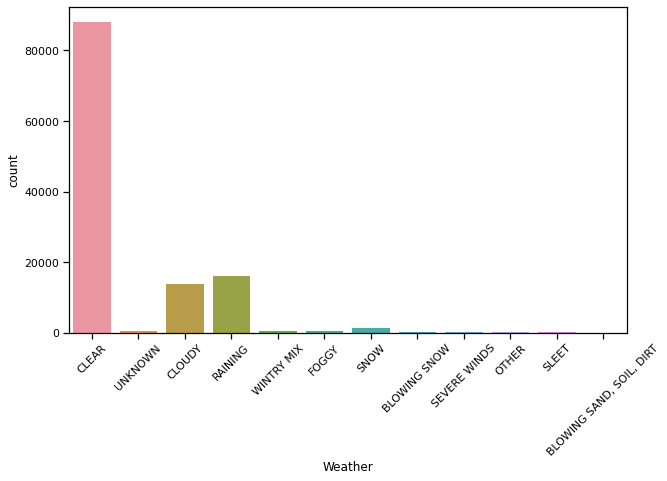

In [ ]:
ax = sns.countplot(df['Weather'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

The maximum number of accidents occured in 'Clear' weather. Followed by a few in 'Cloudy' and 'Raining' weather. 

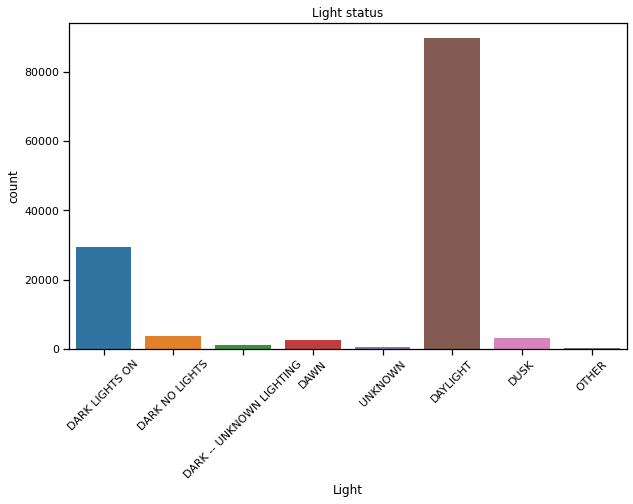

In [ ]:
ax = sns.countplot(df['Light'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title('Light status');

Most of the accidents also occured in Daylight and with Dark Lights On. 

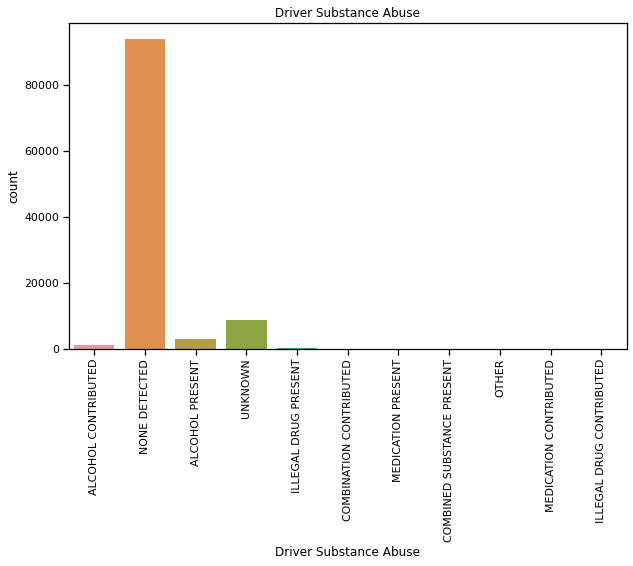

In [ ]:
ax = sns.countplot(df['Driver Substance Abuse'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Driver Substance Abuse');

This also proves that most drivers were not under the influence of any Alcohol or Substances.

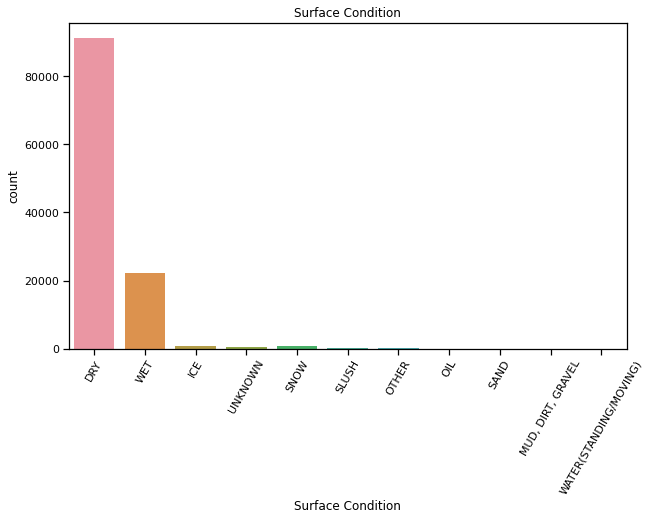

In [ ]:
ax = sns.countplot(df['Surface Condition'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.title('Surface Condition');

We can show from the data that most of the accidents occur when the road surface condition is dry. The next highest condition is when the road is wet but that is only about 1/5 of the size of the accidents in dry conditions 

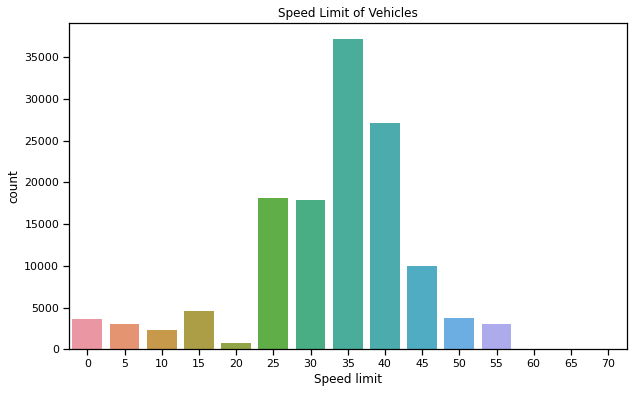

In [ ]:
sns.countplot(df['Speed Limit'])
plt.title('Speed Limit of Vehicles')
plt.xlabel('Speed limit');

These vehicles weren't even traveling that fast when they got into an acident. Typically the mojority of the accidents were between 30 - 40 mph.

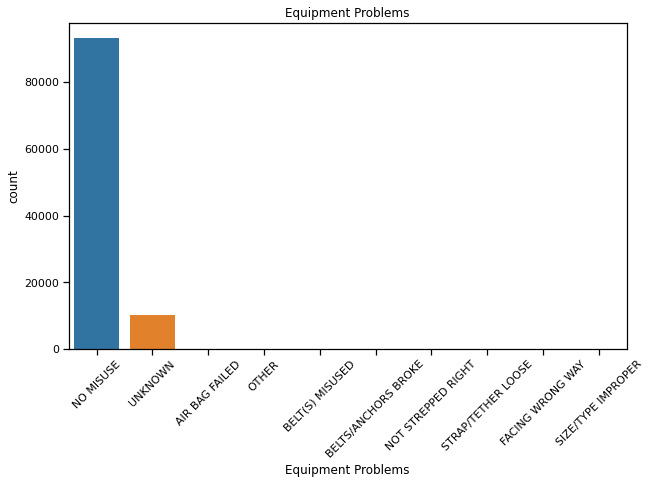

In [ ]:
EqProb = df['Equipment Problems']
ax = sns.countplot(EqProb)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title('Equipment Problems');

While we comb through some common driving situations and errors, we can show that in these accidents, they are mostly no missuse with the vehicle's equipment. Which tell us all the vehicles involed did not experience any equipment failure to cause the acident.

*The odd thing about this dataset is that most accidents occured in broad daylight, with clear weather, at a not so fast speed and the drivers not being under any influence, nor were there any equipment misuse.*

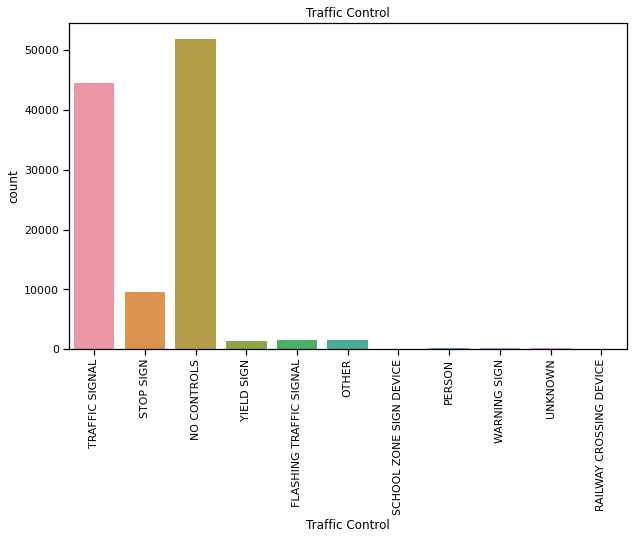

In [ ]:
ax = sns.countplot(df['Traffic Control'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Traffic Control');

What we found intriguing in our exploration, is that we found that most collisions occur when there are no 'Traffic Controls' nearby, and that accidents at traffic light come in a close second.

###**Data cleaning and preprocessing**

Part of the process to cleaning up the data requires to drop some columns right away to help narrow down the dataset to the variables that we will be focusing on.

In [ ]:
# drop the columns that won't be used (this depends completely on your project)
df = df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Off-Road Description', 
              'Municipality', 'Vehicle ID', 'Drivers License State', 
              'Non-Motorist Substance Abuse', 'Driverless Vehicle',	
              'Parked Vehicle', 'Latitude',	'Longitude', 'Location', 
              'Cross-Street Type', 'Related Non-Motorist', 'Crash Date/Time', 'Circumstance'], axis=1)

# creating an "hour of day" column
# a "day of week" or "month of year" column might also be handy
df['hour'] = df.index.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131610 entries, 2015-01-01 00:30:00 to 2021-10-21 09:26:00
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Agency Name                     131610 non-null  object
 1   ACRS Report Type                131610 non-null  object
 2   Route Type                      118773 non-null  object
 3   Road Name                       119448 non-null  object
 4   Cross-Street Name               119443 non-null  object
 5   Collision Type                  131176 non-null  object
 6   Weather                         121261 non-null  object
 7   Surface Condition               116111 non-null  object
 8   Light                           130504 non-null  object
 9   Traffic Control                 111129 non-null  object
 10  Driver Substance Abuse          107621 non-null  object
 11  Driver At Fault                 131610 non-null  object
 

In [ ]:
df.isna().mean().sort_values(ascending=False)

Equipment Problems                0.213251
Driver Substance Abuse            0.182273
Traffic Control                   0.155619
Surface Condition                 0.117765
Route Type                        0.097538
Cross-Street Name                 0.092447
Road Name                         0.092409
Weather                           0.078634
Vehicle Continuing Dir            0.015143
Vehicle Going Dir                 0.015143
Vehicle Body Type                 0.014710
Light                             0.008404
Collision Type                    0.003298
Vehicle Movement                  0.002059
Vehicle Second Impact Location    0.001945
Vehicle Damage Extent             0.001816
Vehicle First Impact Location     0.001185
Vehicle Model                     0.000425
Vehicle Make                      0.000167
Vehicle Year                      0.000000
DayOfWeek                         0.000000
Agency Name                       0.000000
Speed Limit                       0.000000
ACRS Report

You can see from above that a majority of our current dataset has less than 10% of data that is NA. That is going to help decide on what the next columns are that we be dropping after we explore more.


There are even some rows in df that still have a higher percentage of NA values. 

In [ ]:
df.isna().mean(axis=1).sort_values(ascending=False)

Crash Date/Time
2015-02-12 15:29:00    0.428571
2020-02-13 21:45:00    0.392857
2017-08-20 23:11:00    0.392857
2016-11-30 16:42:00    0.357143
2018-09-30 16:53:00    0.357143
                         ...   
2017-11-15 11:03:00    0.000000
2017-11-15 10:08:00    0.000000
2017-11-15 09:20:00    0.000000
2017-11-15 09:20:00    0.000000
2021-10-21 09:26:00    0.000000
Length: 131610, dtype: float64

Plotting the NA values is also helpful. We are able to see where in our dataset most of these values lie.

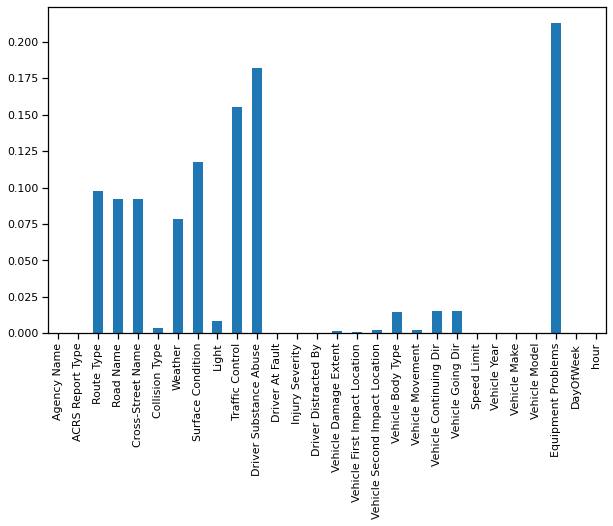

In [ ]:
(df.isna().mean().plot.bar())

Looking at this bar graph we are able to conclude the over all majority of NA values are in the equipment problems column. We will take of that below.

Droping more columns that are not needed for our project. Upon further investigation, these colums are always helpful but not needed for the more detailed aspects that we want to focus on.




In [ ]:
df = df.drop([ 'Agency Name', 'ACRS Report Type', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Traffic Control', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Movement', 
       'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
       axis=1)

Dropping all the rest of the NA values in our dataset


In [ ]:
df = df.dropna()

###**Data exploration and visualization**

From the visualization above we are able to see the basic structure of our dataset. We explored a few variables but our search requires us to dig a little deeper.

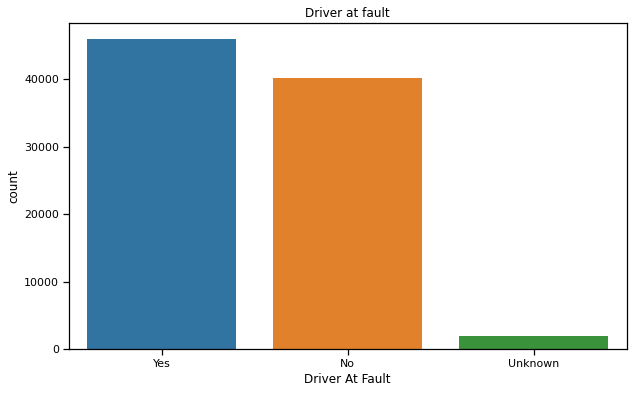

In [ ]:
sns.countplot(df['Driver At Fault'])
plt.title('Driver at fault');

There is just a little difference between number of accidents occuring due to the drivers being at fault and not being at fault.

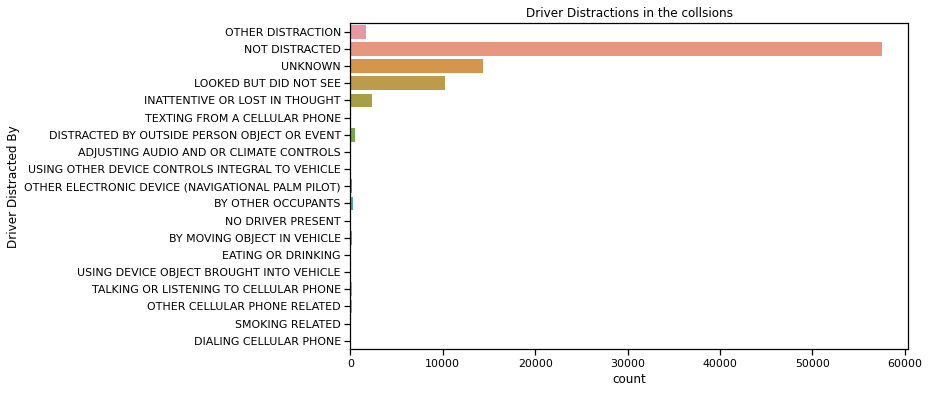

In [ ]:
ax = sns.countplot(y="Driver Distracted By", data=df)
plt.title('Driver Distractions in the collsions');

This graph shows that in most accidents, the driver was not distracted and yet an accident occured.

Surprising that almost no accidents occured due ro the driver using a cell phone.

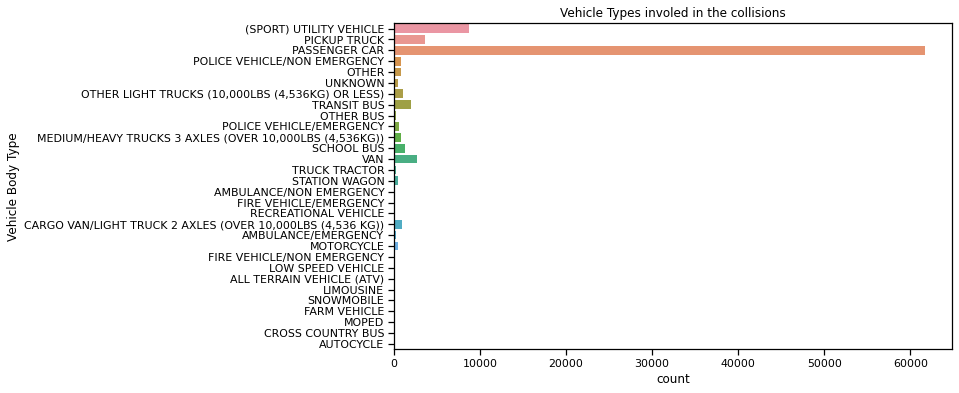

In [ ]:
ax = sns.countplot(y="Vehicle Body Type", data=df)
plt.title('Vehicle Types involed in the collisions');

The maximum number of collisions have occured in a passenger car.

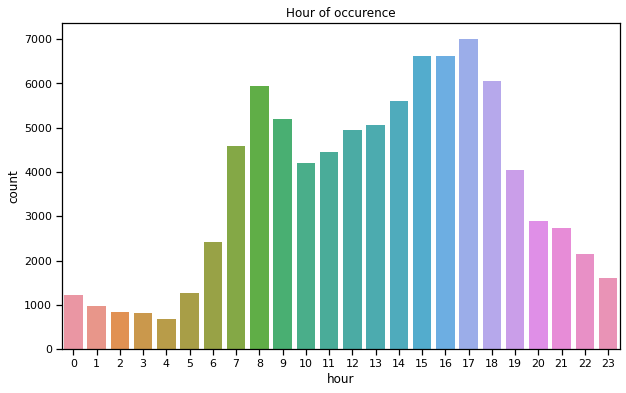

In [ ]:
sns.countplot(df['hour'])
plt.title("Hour of occurence");


The most accidents have occured from 3 to 6 pm, assuming that's usually when people get off work or school. Also in the morning, around 8 to 9 pm, when people are rushing to work.

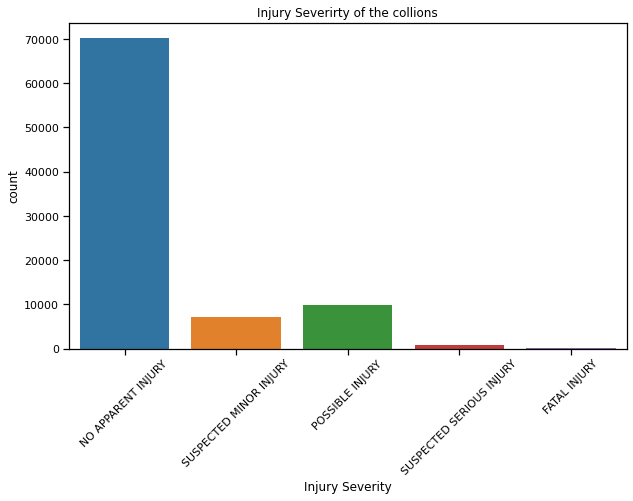

In [ ]:
ax = sns.countplot(df['Injury Severity'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("Injury Severirty of the collions");


In maximum cases, there was no apparent injury. But a few people had a possuble injury and few had suspected a minor injury.

Performing nominal encoding on Injury Severeity (a nominal categorical variable)

In [ ]:
pd.get_dummies(df['Injury Severity'], drop_first=True).head()

,NO APPARENT INJURY,POSSIBLE INJURY,SUSPECTED MINOR INJURY,SUSPECTED SERIOUS INJURY
Crash Date/Time,,,,
2015-01-01 00:30:00,1,0,0,0
2015-01-01 01:14:00,1,0,0,0
2015-01-01 01:26:00,1,0,0,0
2015-01-01 01:26:00,1,0,0,0
2015-01-01 02:00:00,1,0,0,0


Getting the number of collions occuring in each Collision Type

In [ ]:
df['Collision Type'].value_counts()

SAME DIR REAR END               32258
STRAIGHT MOVEMENT ANGLE         15992
SAME DIRECTION SIDESWIPE         8282
SINGLE VEHICLE                   7632
HEAD ON LEFT TURN                7122
OTHER                            6154
SAME DIRECTION LEFT TURN         2004
SAME DIRECTION RIGHT TURN        1977
HEAD ON                          1907
OPPOSITE DIRECTION SIDESWIPE     1240
ANGLE MEETS LEFT TURN            1124
ANGLE MEETS RIGHT TURN            618
SAME DIR REND RIGHT TURN          401
SAME DIR REND LEFT TURN           375
ANGLE MEETS LEFT HEAD ON          358
SAME DIR BOTH LEFT TURN           335
OPPOSITE DIR BOTH LEFT TURN       169
UNKNOWN                           101
Name: Collision Type, dtype: int64

Getting the number of collions occuring in each Weather

In [ ]:
df['Weather'].value_counts()

CLEAR                       63318
RAINING                     12068
CLOUDY                      10428
SNOW                          950
FOGGY                         378
WINTRY MIX                    258
OTHER                         179
UNKNOWN                       172
SLEET                         134
SEVERE WINDS                   93
BLOWING SNOW                   65
BLOWING SAND, SOIL, DIRT        6
Name: Weather, dtype: int64

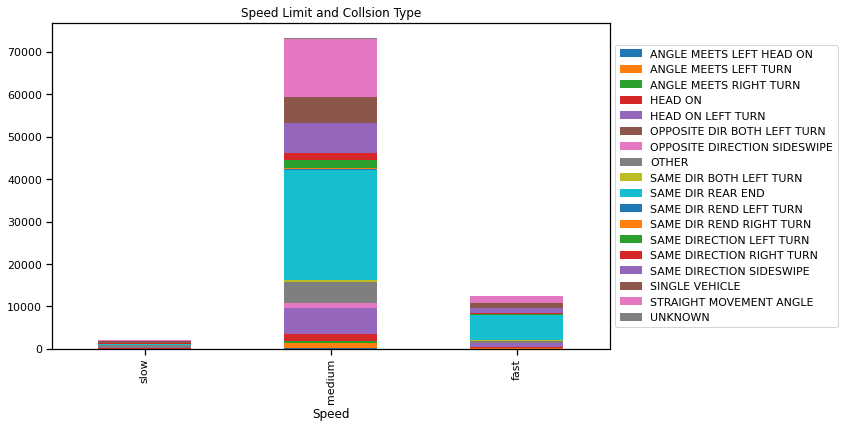

In [ ]:
breaks = [0, 20, 40, 60]
df['Speed'] = pd.cut(df['Speed Limit'], include_lowest=True, bins=breaks, labels=['slow', 'medium', 'fast'])
pd.crosstab(df['Speed'], df['Collision Type']).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Speed Limit and Collsion Type");

The most accidents have occured at medium speed (20-40 m/hr) by being rear-ended or being sideswiped from the opposite direction.

**What type of collisions happen througout the day?**

We could assume that more accidents would happen in the mornings or evenings. Considering people going to/from work/school. Those times are generally busier on the roads everywhere.

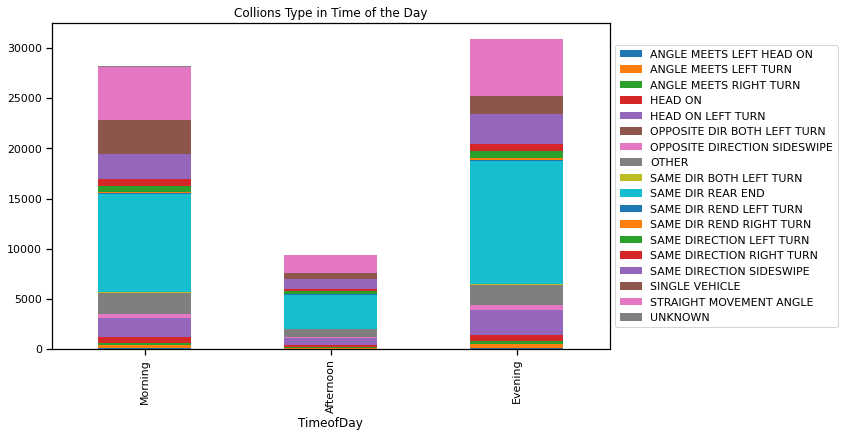

In [ ]:
TimeOfDay = [0, 10, 12, 17]
df['TimeofDay'] = pd.cut(df['hour'], include_lowest=True, bins=TimeOfDay, labels=['Morning', 'Afternoon', 'Evening'])
pd.crosstab(df['TimeofDay'], df['Collision Type']).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Collions Type in Time of the Day");

We are able to see that more collisions happen in the evening. The type of collisions do vary but throughout each day most collisions are being rear-ended or being sideswiped from the opposite direction.

**Through the day, when are collisons more severe?**

We know that these collisons happen throughout each day, but is there a specific time that more collisions happen?

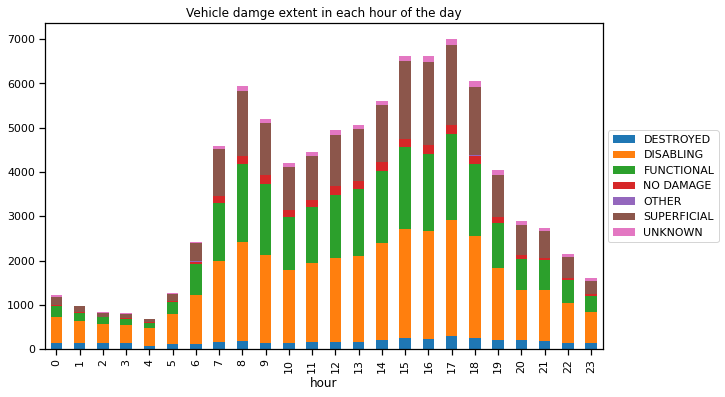

In [ ]:
pd.cut(df['hour'], include_lowest=True, bins=TimeOfDay, labels=['Morning', 'Afternoon', 'Evening'])
pd.crosstab(df['hour'], df['Vehicle Damage Extent']).plot.bar(stacked=True)
plt.title('Vehicle damge extent in each hour of the day')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

We are able to determine that in between the hours of 7am to 6pm most accidents diable the drivers vehicle. For the vehicles that are not diabled in the collsion , its more of a likely chance that the vehicle is still functional or has superficial damage. 

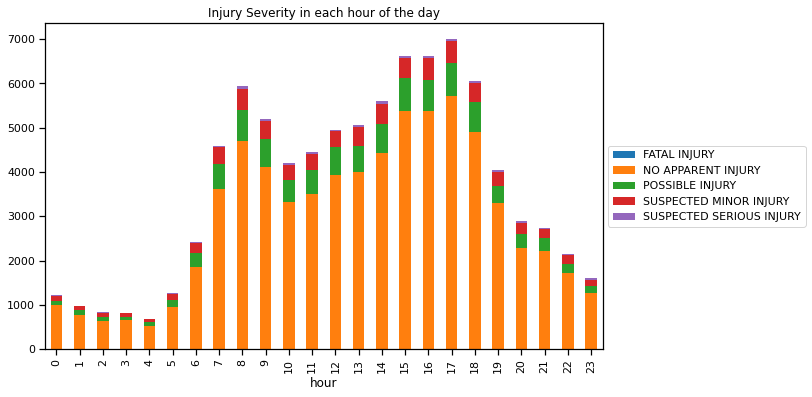

In [ ]:
pd.cut(df['hour'], include_lowest=True, bins=TimeOfDay, labels=['Morning', 'Afternoon', 'Evening'])
pd.crosstab(df['hour'], df['Injury Severity']).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("Injury Severity in each hour of the day");

Mostly, there was no apparent injury at all times of the day. Very few people did have a suspected minor injury or some possibloe injury.

In [ ]:
df['DayOfWeek'].value_counts()

1    14141
4    14079
3    13998
2    13847
0    12887
5    10451
6     8646
Name: DayOfWeek, dtype: int64

As we suspected most accidents happened on a Monday, but what suprised us was that Thursday came in second. Thats intersting since we expecting Friday to have the second most collisions on a specific day of the week.

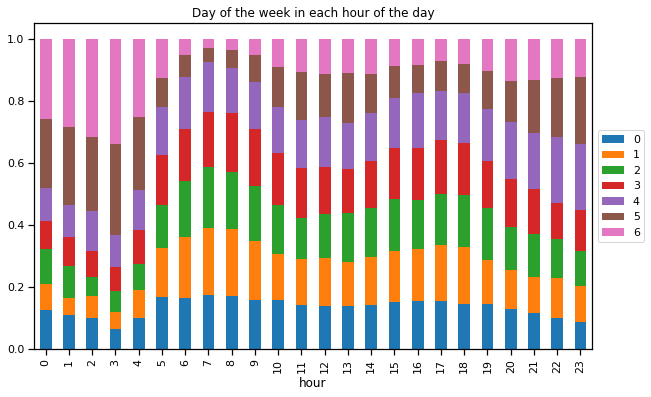

In [ ]:
pd.cut(df['hour'], include_lowest=True, bins=TimeOfDay, labels=['Morning', 'Afternoon', 'Evening'])
tbl = pd.crosstab(df['hour'], df['DayOfWeek'], normalize='index')
tbl.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("Day of the week in each hour of the day");

Majority of the collisons have occurred during the weekdays (0 - 4). Whereas, on the weekends (5 and 6), the collisions are occuring through the day, except the morning time (4 to 9 am)

###**Conclusion**

Throughout our search in the Crash Data of Montgomery County in Maryland, we found many collisions on average per day and based on the data. There isn't a defined reason behind it. However, we did find some interesting facts about the driving habits of those individuals. A majority of these accidents happen with fully-operational vehicles with sober and undistracted drivers on clear, dry days while traveling at a speed of 35 mph on average. These collisions are also more common between the mornings of 7-8 am and 3-6, Monday thru Friday, which may be due to commuting hours to and from work or school. Another thing that we found was that in most of these rear-end collisions, the vehicles were still functional with no or superficial damage.

In conclusion, our search leads us to more questions and a thirst for further exploration. We wonder if that is average for a county of that size and comparable to other counties with the same population. We know that drivers in Montgomery County appear to be distracted by something on average 50 times a day for no apparent reason, which leads to these collisions. Our search leaves us with one last question, What's so distracting in Montgomery County?

